The main objective of this notebook is to repertory the different functions use for obtaining the results of our project.

In [16]:
#imports
%matplotlib inline
from pylab import *
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio 
from numpy.fft import fft, ifft
from skimage.color import rgba2rgb,rgb2gray
import cv2

Let's make a code that load a video and gives us some stats on it

We want to compare the images with a reference to do it, we decide to choose between the first frame, the mean frame and the original unnoised circle

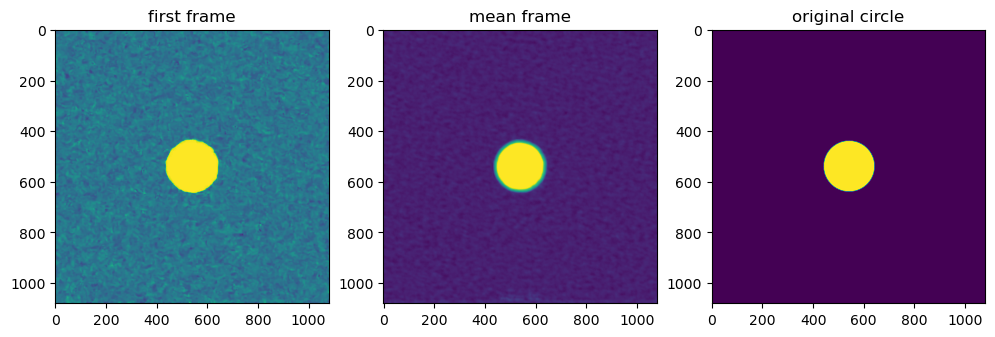

In [4]:
#loading the video and getting the first frame:
vid1 = cv2.VideoCapture('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4')
n=vid1.get(cv2.CAP_PROP_FRAME_COUNT)
vid1.set(cv2.CAP_PROP_POS_FRAMES, 1)
ret1, frame1 = vid1.read()
vid1.release()
frame1=rgb2gray(frame1/np.max(frame1))

plt.figure(figsize=(12,8))

plt.subplot(131,title="first frame")
plt.imshow(frame1)

#calculating the mean frame:
frames=[]

    #retrieving every frame
for i in range(int(n)):
    vid1 = cv2.VideoCapture('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4')
    vid1.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = vid1.read()
    frames.append(rgb2gray(frame/np.max(frame)))


frames=np.array(frames)
mean=np.zeros_like(frame1)

for f in frames :
    mean= mean + f

mean=mean/len(frames)

plt.subplot(132,title="mean frame")
plt.imshow(mean)


#computing the original circle unnoised:
img = np.zeros((1080, 1080), dtype=np.uint8)
circle=(cv2.circle(img, (1080 // 2, 1080 // 2), 100, 255, -1)/255)

plt.subplot(133,title="original circle")
plt.imshow(circle)


Now let's compare the video respecting to the different "references"

In [11]:
def stats(vidname,reference,plot=False):

    #getting the number of frames
    vid = cv2.VideoCapture(vidname)
    n=vid.get(cv2.CAP_PROP_FRAME_COUNT)

    #initialisation
    MSE = []
    SSIM = []
    PSNR=[]

    for i in range(int(n)):

        #getting the coreesponding frame
        vid = cv2.VideoCapture(vidname)
        vid.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = vid.read()
        frame=rgb2gray(frame/np.max(frame))

        #doing the stats
        MSE.append(mse(reference,frame))
        SSIM.append(ssim(reference,frame))
        PSNR.append(peak_signal_noise_ratio(reference,frame))

    if plot:
        plt.figure(figsize = (12, 6))
        plt.subplot(1,3,1,title="MSE")
        plt.plot(MSE)
        plt.subplot(1,3,2,title="SSIM")
        plt.plot(SSIM)
        plt.subplot(1,3,3,title="PSNR")
        plt.plot(PSNR)

    return MSE,SSIM,PSNR

Stats for the first frame:

c:\Users\Michel\.julia\conda\3\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


([0.06801491516216397,
  0.0,
  0.0040077923839238055,
  0.004465551256469786,
  0.005825459496722075,
  0.00557705709129132,
  0.004313307249977043,
  0.003937548534664693,
  0.0039414308808864255,
  0.004455459976981147,
  0.005660538447156611,
  0.0057603255731435675,
  0.0042902875687797866,
  0.0038727396277692173,
  0.0038424828091010526,
  0.00432708138150051,
  0.005513958412267917,
  0.00562446564080552,
  0.00432811703510089,
  0.003829075418094584,
  0.003850031561796828,
  0.0042204893635050785,
  0.005687778616836755,
  0.005635241941158431,
  0.004239051779981983,
  0.00376667708071039,
  0.0038760292898378573,
  0.004159783070522024,
  0.0056618051222569596,
  0.005554123733782472,
  0.004111160531147568,
  0.0038502466933047516,
  0.0038687560221109486,
  0.0042959640981272505,
  0.005685547292170086,
  0.005725103238686605,
  0.004103572671465645,
  0.003805802962995749,
  0.003833846958020812,
  0.0041938688751420134,
  0.005706635574995075,
  0.005572288005268108,
  

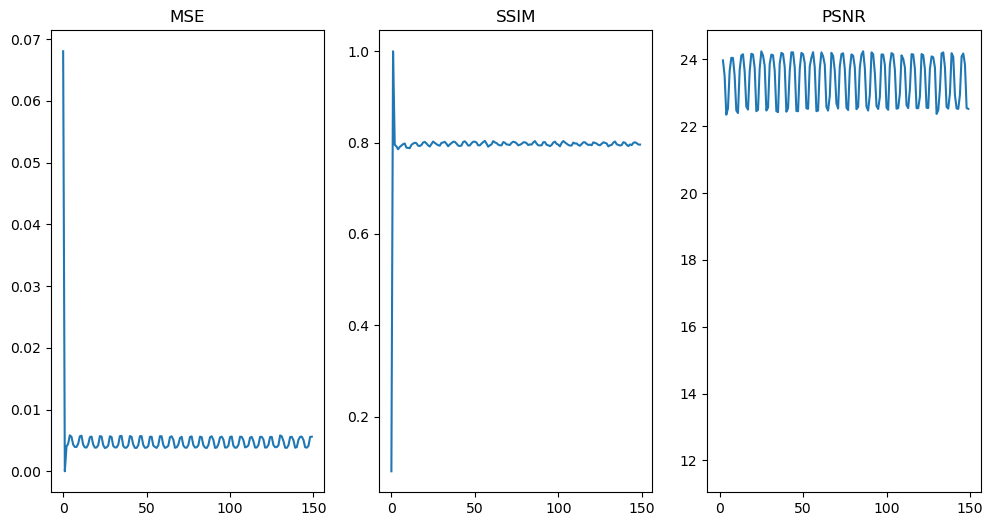

In [13]:
stats('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4',frame1,True)

Stats for the mean frame

([0.2946567425321686,
  0.1902174675104575,
  0.18889281446826342,
  0.18411151074537127,
  0.18274323539819326,
  0.18353835549596867,
  0.1866594144316294,
  0.18877270746617741,
  0.18945568613554933,
  0.1873337414610516,
  0.18236444885585312,
  0.18522645543135186,
  0.18706652939522622,
  0.18866418786143965,
  0.1910687555380682,
  0.18914954206258097,
  0.18605330242145365,
  0.18676786478376906,
  0.18908217316546677,
  0.19204725816807222,
  0.19163183771399936,
  0.1890523323955025,
  0.18575291950125405,
  0.1860962974933983,
  0.18930685263741703,
  0.1904058194605358,
  0.19014069811032291,
  0.18948959575192764,
  0.18636418047336303,
  0.18561461365312654,
  0.18925102365588917,
  0.1920524430939568,
  0.19175494571546675,
  0.18974812822856785,
  0.18672093995736957,
  0.18629214756498275,
  0.1896501379371746,
  0.19105752513724641,
  0.19132229366651643,
  0.19015404966006444,
  0.18584933854348346,
  0.1852827536993318,
  0.1893853795217456,
  0.1914399062950127,
 

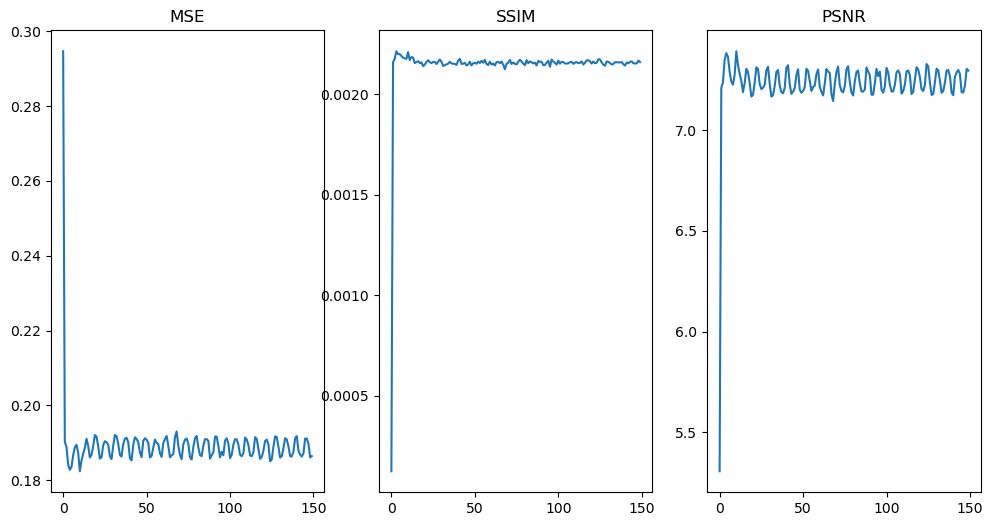

In [14]:
stats('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4',mean,True)

Stats for the initial unnoised circle

([0.2683034286587456,
  0.16336417116709162,
  0.16234789140685774,
  0.15810829952667246,
  0.16045499081321246,
  0.16078037548776525,
  0.16008031333490816,
  0.16188609476209712,
  0.16258871396174154,
  0.16082115017228646,
  0.16002283153626407,
  0.16289408273574413,
  0.16113090943368877,
  0.16194783562697931,
  0.16426287925575836,
  0.16328369774522442,
  0.1639740342815091,
  0.16477815395910994,
  0.1630317203022913,
  0.1655475287327728,
  0.16513598189081957,
  0.1630104737609238,
  0.16392910906592764,
  0.16420269146512975,
  0.1632584288571917,
  0.16390703149152105,
  0.16364607614698337,
  0.16336696020161695,
  0.16457774338454945,
  0.16355133450495155,
  0.1630544381109579,
  0.1655580109743462,
  0.1652605899810467,
  0.16379362256071772,
  0.16469427236275974,
  0.16459842498839383,
  0.16346826534713713,
  0.164560445536531,
  0.16483169339284048,
  0.16398480986340505,
  0.1638436395662382,
  0.1632682094619936,
  0.16329943105957606,
  0.16492415835800517,
 

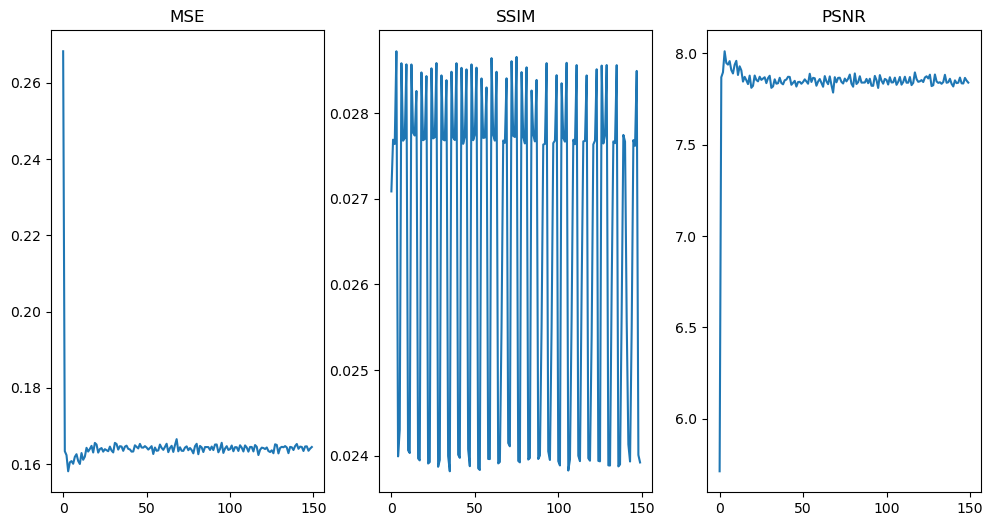

In [15]:
stats('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4',circle,True)

Given the results we decided to use the original circle as a reference as it gives us the better results in terms if periodicity and amplitude.
We will then perform a frequence analisis exclusively on the SSIM performance

c:\Users\Michel\.julia\conda\3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amplitude')

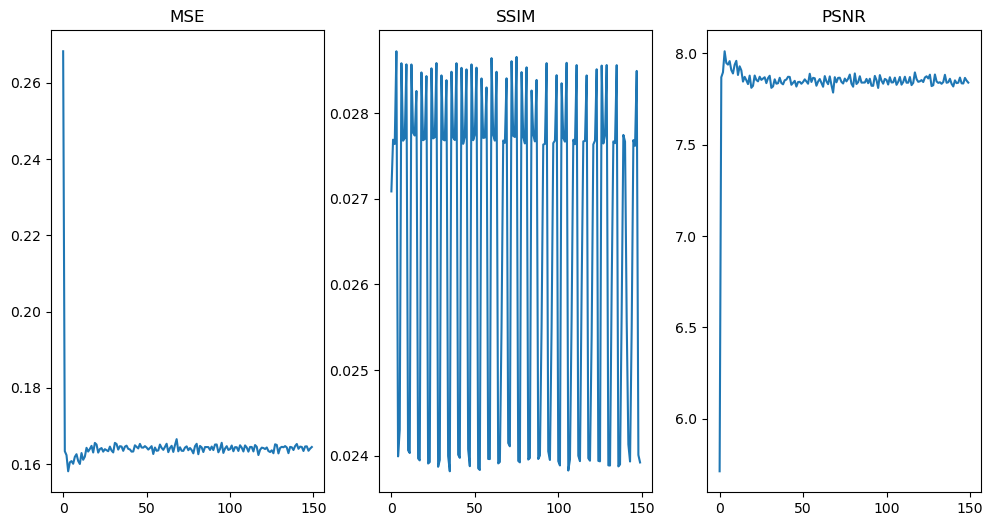

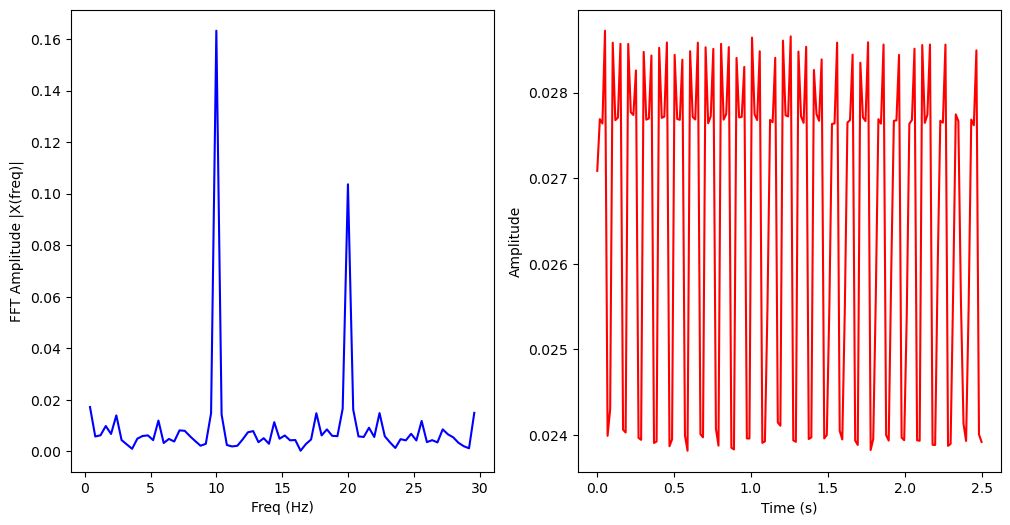

In [19]:
MSE,SSIM,PSNR = stats('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4',circle,False)

#creating the variables for the fourier transformation
t=np.linspace(0,2.5,int(n))
X = fft(SSIM)
N = len(X)
n = np.arange(N)
T = N/60
freq = n/T

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[1:n_oneside]

plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.plot(f_oneside, np.abs(X[1:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(1,2,2)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

By spectral analisis we can then get the frequency of th circle with accurate precision. Let's now test the limits of the project model but first let's functionnalize our analisis

In [23]:
def get_frequency(vidname,plot=False):

    #fnerate the circle unnoised
    img = np.zeros((1080, 1080), dtype=np.uint8)
    circle=(cv2.circle(img, (1080 // 2, 1080 // 2), 100, 255, -1)/255)

    #initialization
    SSIM = []

    #getting the number of frames
    vid1 = cv2.VideoCapture('projet comput/vidéos amplifiées/oscillating_circle_10hz_2px_60fps_rad_100.mp4')
    n=vid1.get(cv2.CAP_PROP_FRAME_COUNT)

    #calculating each frame SSIM
    for i in range(int(n)):
        vid = cv2.VideoCapture(vidname)
        vid.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = vid.read()
        SSIM.append(ssim(circle,rgb2gray(frame/np.max(frame))))

    
    #Fourier Transformation    
    t=np.linspace(0,2.5,150)
    X = np.array(fft(SSIM))
    N = len(X)
    n = np.arange(N)
    T = N/60
    freq = n/T

    # Get the one-sided specturm
    n_oneside = N//2
    # get the one side frequency
    f_oneside = np.array(freq[1:n_oneside])

    if plot:

        plt.figure(figsize = (12, 6))
        plt.subplot(1,2,1)
        plt.plot(f_oneside, np.abs(X[1:n_oneside]), 'b')
        plt.xlabel('Freq (Hz)')
        plt.ylabel('FFT Amplitude |X(freq)|')

        plt.subplot(1,2,2)
        plt.plot(t, ifft(X), 'r')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')


    #We return all main frequencies because sometimes due to noise the harmonics can be present with a higher coeeficient that the fondamental
    return f_oneside[np.abs(X[1:n_oneside])>=max(np.abs(X[1:n_oneside]))/2]

c:\Users\Michel\.julia\conda\3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


array([ 4.8,  5.2, 10. ])

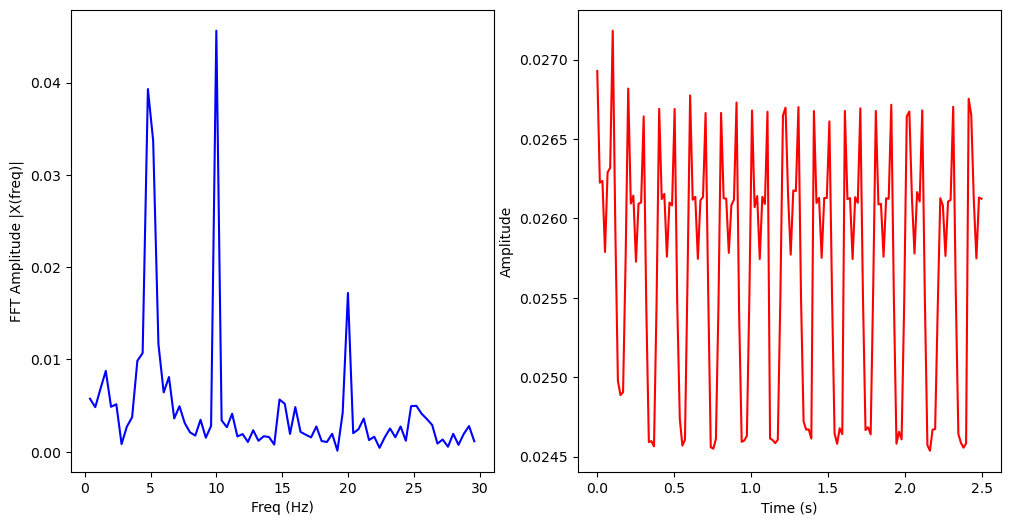

In [24]:
get_frequency('New videos/oscillating_circle_5hz_2.0px_60fps_rad_100.mp4',True)